In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("customer_churn_data.csv")

In [11]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [12]:
df.tail(3)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [13]:
df.info

<bound method DataFrame.info of      CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
1             2   43    Male       0           36.67  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  
0       Fiber Optic        353.40         Yes   Y

In [12]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [13]:
df["InternetService"] = df["InternetService"].fillna("")

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [16]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [17]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [38]:
!pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

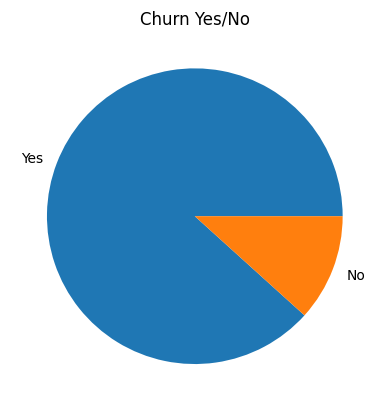

In [10]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Yes/No")
plt.ylabel("")
plt.show()

In [23]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [25]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [27]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [29]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

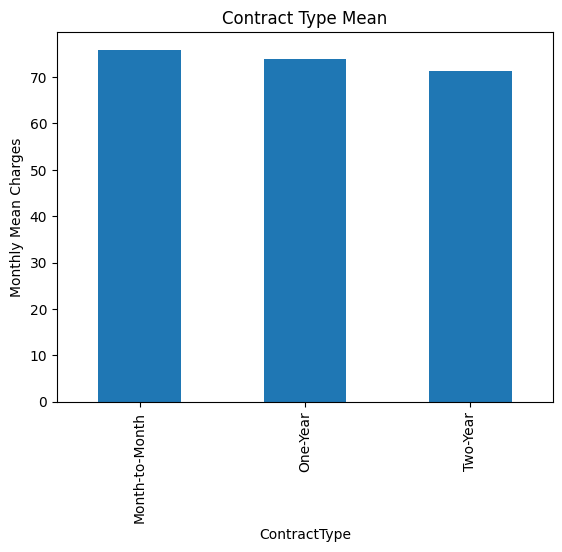

In [39]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Contract Type Mean")
plt.ylabel("Monthly Mean Charges")
plt.show()

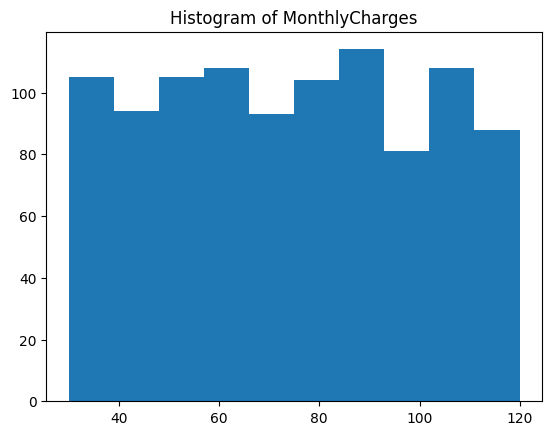

In [46]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of MonthlyCharges")
plt.show()

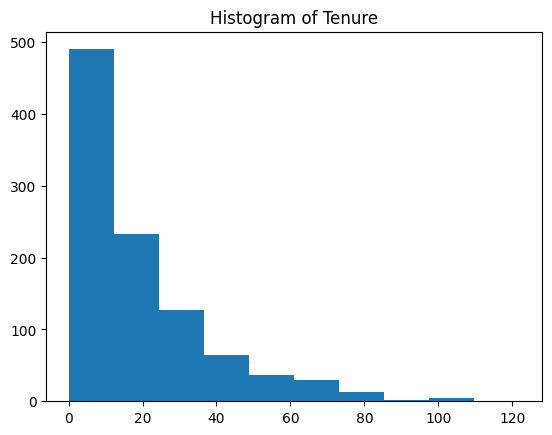

In [47]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [ ]:
# Starting with feature engineering